# <div style="text-align:center">Handout: "Historical Background"</div>

## <span style="color:blue">1. Background</span>

### 1.1. Classical vs Quantum Physics

<ul>
<li>Newton’s mechanics and Maxwell’s theory of electromagnetism are referred to as **classical physics**</li>
<li>Despite success of classical physics, it could not explain several experimental observations that appeared at the end of XIX and the beginning of XX centuries
</li>
<li>Problems of classical physics:
<ul>
<li>Blackbody radiation</li>
<li>Photoelectric effect</li>
<li>Spectral lines</li>
</ul>
</li>
<li>These observations can be correctly described using quantum mechanics: provides correct description of molecules, atoms, and subatomic particles</li>
</ul>

### 1.2. Electromagnetic radiation

Heated objects emit radiation (glow)!  

As the temperature increases, radiation changes from <span style="color:red">red</span> to <span style="color:blue">blue</span>.  

Increasing temperature increases frequency $\nu$

<img src="../image/em_spectrum.png" width="700">  

Source: Brown, T. L. Chemistry : The Central Science, 14th ed.; Pearson: New York, 2018.


Frequency $\nu$ and wavelength $\lambda$ are inveresely related:
\begin{align}
\nu = \frac{c}{\lambda}
\end{align}
where $c$ is the speed of light, $2.998*10^{-8} m/s$.  

Increasing temperature $T$ increases frequency ($\nu$) of the radiation

## <span style="color:blue">2. Failures of classical physics</span>

### 2.1. Blackbody Radiation

Most *real* objects absorb and emit light at **certain** frequencies  

A blackbody is an *ideal/unphysical* object which absorbs and emits at **all** frequencies  

### 2.2. Rayleigh-Jeans Law

Classically, the energy density of a blackbody came from the work done by Lord Rayleigh and J.H. Jeans and is appropriately-named the **Rayleigh-Jean's law**.

\begin{align}
\rho_\nu (T) d\nu = \frac{8 \pi k_B T}{c^3} \nu^2 d\nu
\end{align}


The Rayleigh-Jeans theory assumes that radiation is emitted by *oscillating* electrons with energies that have **any** values

In the next few sections of this notebook, we will explore the failure of Rayleigh-Jean's law at modeling high frequency radiation!

#### Example: Rayleigh-Jeans Law

First, let's define some constants:

In [2]:
# Use comments in your code cells to make the code more readible
# Make sure your code is clean and variables have readable names

# Import Python modules
import matplotlib.pyplot as plt
import numpy as np

# Define constants
h = 6.634*10**(-34) # (J/s)  Planck's constant
c = 2.998*10**(17)  # (nm/s) Speed of light
k = 1.381*10**(-23) # (J/K)  Boltzmann constant

Now, we define a function for Rayleigh-Jean's law that takes a temperature $T$ $(K)$ and a range of wavelengths $\lambda$ $(nm)$ as parameters:

In [3]:
# Define function to calculate blackbody energy density using Rayleigh-Jean's Law
def rj_law(la,temp):
    return (8.0*np.pi*k*temp)/(la**4)

Next, we can define parameters of our plot (feel free to experiment with these values to see how the plot changes!)

In [4]:
la = np.arange(100,6100,50)    # range of wavelengths from 500 to 6000, increments of 100 (units: nm)
T  = 5500                      # temperature (units: Kelvin)

Now, let's plot the energy density of the blackbody radiation that Rayleigh-Jean's Law predicts for this range of wavelengths

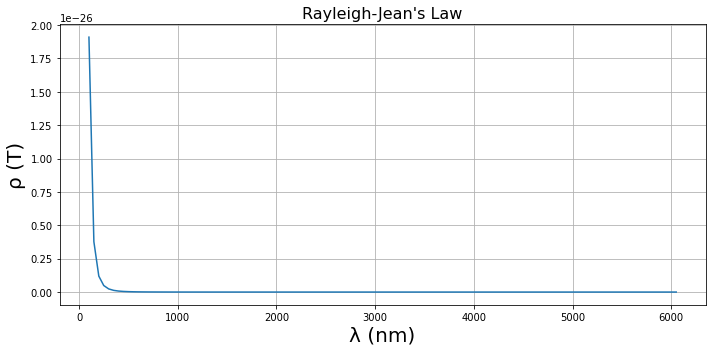

In [5]:
# Evaluate wavefunction at each x
rj_energy_values = rj_law(la,T)

# Set up graph and plot
plt.figure(figsize=(10,5))
plt.plot(la, rj_energy_values)
plt.xlabel('λ (nm)', fontsize=20)
plt.ylabel('ρ (T)', fontsize=20)
plt.title('Rayleigh-Jean\'s Law', fontsize=16)
plt.tight_layout()
plt.grid()

**Question: What do you notice as wavelength decreases/frequency increases?**

**<span style="color:red">Problem: Classical theory and experiment diverge as frequency of radiation approaches ultraviolet region!</span>**

### 2.3. Planck's Distribution Law

In 1900, Max Planck provided the first successful explanation of blackbody radiation. Planck assumed that energies of electrons are discrete -- proportional to an integral multiple of the frequency:
\begin{align*}
E = nh\nu \ \ \ \ \ \ \ \ \ \ \ \ n &= 0,1,2,3\cdots \\
                                  h &= 6.626 * 10^{-34} J \cdot s \ \ \ \ \ \ \ \ \ \text{Planck's constant}
\end{align*}

Using this quantization of energy, Planck then derived his own equation for energy density:

\begin{align}
\rho_\nu (T) d\nu = \frac{8 \pi h}{c^3} \frac{\nu^3 d\nu}{e^{h\nu/k_B T}-1}
\end{align}

Notice that Planck's distribution law reduces to Rayleigh-Jeans law at small $\nu$!

#### Example: Planck's Distribution Law

Let's define another function, this time for Planck's distribution law:

In [16]:
# Define function to calculate blackbody energy density using Planck's Distribution Law
def plancks_law(la,temp):
    return ((8.0*np.pi*h*c)/(la**5) * np.e**(-h*c/(la*k*temp)))/(1-np.e**(-h*c/(la*k*temp)))

Now we can plot the blackbody energy density spectrum at the same wavelengths $\lambda$ and the same temperature $T$.

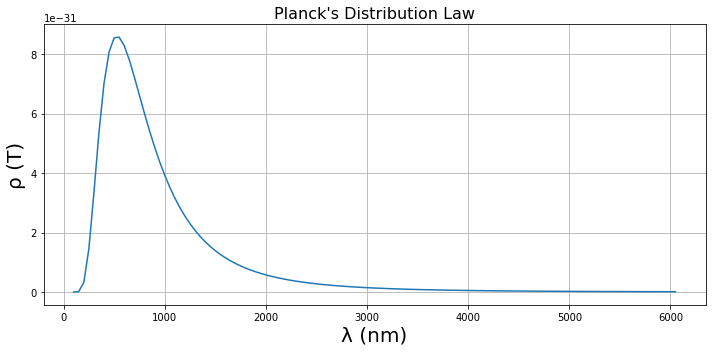

In [17]:
# Evaluate energy density at each wavelength @ temp T
p_energy_values = plancks_law(la,T)

# Set up graph and plot
plt.figure(figsize=(10,5))
plt.plot(la, p_energy_values)
plt.xlabel('λ (nm)', fontsize=20)
plt.ylabel('ρ (T)', fontsize=20)
plt.title('Planck\'s Distribution Law', fontsize=16)
plt.tight_layout()
plt.grid()

### 2.4. Application: Surface temperature of star from spectral data

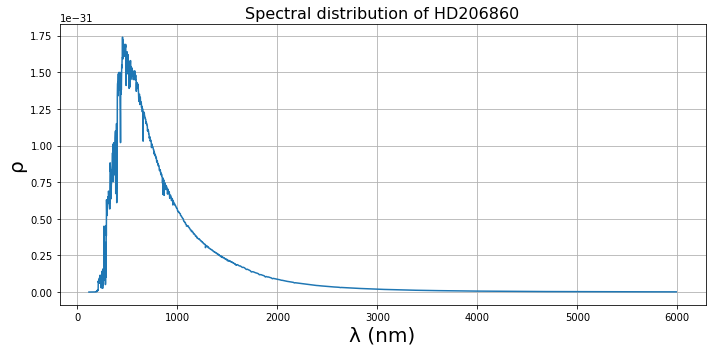

In [18]:
# Create variable for the name of the file
### All y-axis units are in W/cm^2/micron and x-axis units are in microns ###

#filename = 'star_data/hd114710um.txt'
#starname = 'HD114710'
filename = 'star_data/hd206860um.txt'
starname = 'HD206860'
#filename = 'star_data/hd128167um.txt'
#starname = 'HD128167'

# Make empty lists to append values from star data file
x_values = []
y_values = []

# Open and read data from file
infile = open(filename, 'r')

lines = infile.readlines()

for line in lines:
    sline = line.split()
    if float(sline[0])*1000 <= 6000 and float(sline[1]) > 0:
        x_values.append(float(sline[0])*1000.)               # Division by  1000 for unit conversion from data 
        y_values.append(float(sline[1])/100000000000000000.) # Division by 10^17 for unit conversion from data
        
# Close the file
infile.close()

# Set up graph and plot
plt.figure(figsize=(10,5))
plt.plot(x_values, y_values)
plt.xlabel('λ (nm)', fontsize=20)
plt.ylabel('ρ', fontsize=20)
plt.title('Spectral distribution of %s' % starname, fontsize=16)
plt.tight_layout()
plt.grid()

Stellar spectra obtained by:  
Antígona Segura, Kara Krelove, James F. Kasting, Darrell Sommerlatt, Victoria Meadows, David Crisp, Martin Cohen, and Eli Mlawer.Astrobiology.Dec 2003.689-708. http://doi.org/10.1089/153110703322736024

What we will do next is run a non-linear least-squares fitting function on this spectral data with the Planck's Distribution Law equation to determine the "predicted" temperature of the star HD114710:

In [19]:
from scipy.optimize import curve_fit

pred_T, covariance = curve_fit(plancks_law, x_values, y_values, p0=4000)

print ('Predicted temperature: %f K' % pred_T)

Predicted temperature: 3755.754186 K


Now, let's plot the spectral data and Planck's distribution law with our predicted temperature!

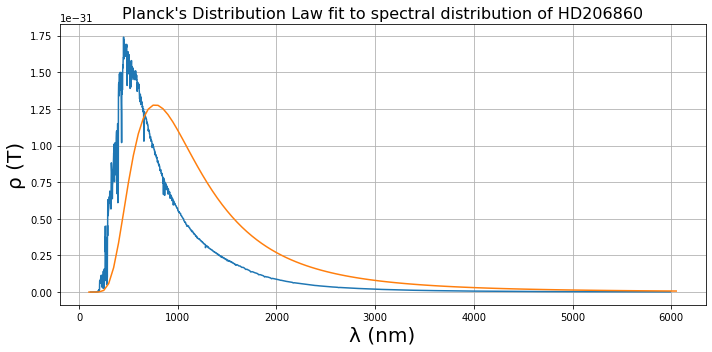

In [20]:
# Calculate new y-values with fitted temperature
fit_p_energy_values = plancks_law(la,pred_T)

# Set up graph and plot
plt.figure(figsize=(10,5))
plt.plot(x_values, y_values)
plt.plot(la, fit_p_energy_values)
plt.xlabel('λ (nm)', fontsize=20)
plt.ylabel('ρ (T)', fontsize=20)
plt.title('Planck\'s Distribution Law fit to spectral distribution of %s' % starname, fontsize=16)
plt.tight_layout()
plt.grid()